In [2]:
!pip install pandas_datareader

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 696.3 kB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


[*********************100%***********************]  5 of 5 completed
Correlation Matrix:
           000001.SS  DX-Y.NYB     ^FTSE     ^GSPC     ^NSEI
000001.SS   1.000000 -0.170512  0.264316  0.350137  0.195856
DX-Y.NYB   -0.170512  1.000000 -0.182514 -0.367567 -0.200806
^FTSE       0.264316 -0.182514  1.000000  0.680544  0.528239
^GSPC       0.350137 -0.367567  0.680544  1.000000  0.594397
^NSEI       0.195856 -0.200806  0.528239  0.594397  1.000000


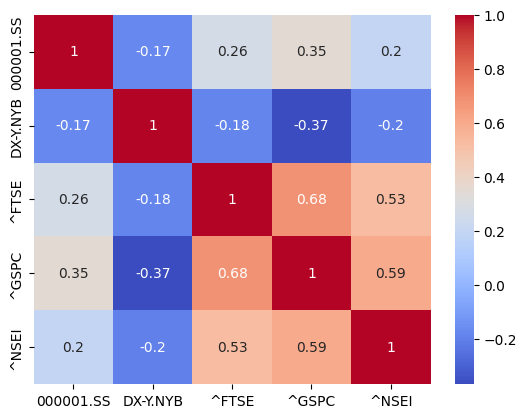

Portfolio return (equal weights):  0.06703093944313131
Portfolio volatility (equal weights):  0.09264361797914883
Optimal weights:  [0.04316223 0.72064885 0.06119735 0.14612988 0.02886168]
Portfolio return (optimal weights):  0.03987613476197477
Portfolio volatility (optimal weights):  0.047903878560841884


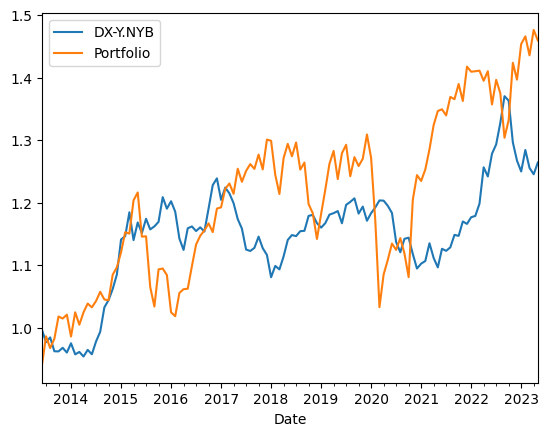

In [9]:
# Importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Selecting index symbols
indices = ['^GSPC', '^FTSE', '^NSEI', '000001.SS', 'DX-Y.NYB']  # S&P 500, FTSE 100, NIFTY 50, SSE Composite Index, US Dollar Index

# Downloading historical data for the last 10 years
data_indices = yf.download(indices, start=datetime.now() - pd.DateOffset(years=10), end=datetime.now())['Adj Close']

# Resampling data to end of each month and calculate returns
returns_indices = data_indices.resample('M').last().pct_change().dropna()

# Calculate correlation matrix
corr_matrix = returns_indices.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Portfolio construction with equal weights
weights_equal = np.array([1/len(indices)]*len(indices))

# Calculate portfolio return
portfolio_return = np.sum(weights_equal * returns_indices.mean()) * 12
print("Portfolio return (equal weights): ", portfolio_return)

# Calculate portfolio volatility
portfolio_volatility = np.sqrt(np.dot(weights_equal.T, np.dot(returns_indices.cov() * 12, weights_equal)))
print("Portfolio volatility (equal weights): ", portfolio_volatility)

# Construct minimum variance portfolio
# we'll use scipy's optimization function
from scipy.optimize import minimize

# objective function
def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(returns_indices.cov() * 12, weights)))

# constraints
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# bounds
bnds = tuple((0, 1) for x in range(len(indices)))
# initial guess
init_guess = [1/len(indices)]*len(indices)

opt_results = minimize(portfolio_volatility, init_guess, method='SLSQP', bounds=bnds, constraints=cons)

optimal_weights = opt_results.x
portfolio_return_opt = np.sum(optimal_weights * returns_indices.mean()) * 12
portfolio_volatility_opt = portfolio_volatility(optimal_weights)

print("Optimal weights: ", optimal_weights)
print("Portfolio return (optimal weights): ", portfolio_return_opt)
print("Portfolio volatility (optimal weights): ", portfolio_volatility_opt)

# Plot optimal portfolio returns and US Dollar Index
returns_indices['Portfolio'] = np.dot(returns_indices[indices[:-1]], optimal_weights[:-1])
returns_indices[['DX-Y.NYB', 'Portfolio']].cumsum().apply(np.exp).plot()
plt.show()